<h1 style='text-align:center;font-weight:bold;color:white'> SAT Score Analysis</h1>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [2]:
data = pd.read_stata('https://dss.princeton.edu/training/linreg1.dta')
data.head(5)

,region,csat,percent,expense,income,high,college
0,South,991,8,3627,27.498,66.900002,15.700000
1,West,920,41,8330,48.254,86.599998,23.000000
2,West,932,26,4309,32.093,78.699997,20.299999
3,South,1005,6,3700,24.643,66.300003,13.300000
4,West,897,47,4491,41.716,76.199997,23.400000


In [3]:
#data.to_csv('linreg_saved.csv', index=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   region   50 non-null     category
 1   csat     51 non-null     int16   
 2   percent  51 non-null     int8    
 3   expense  51 non-null     int16   
 4   income   51 non-null     float64 
 5   high     51 non-null     float32 
 6   college  51 non-null     float32 
dtypes: category(1), float32(2), float64(1), int16(2), int8(1)
memory usage: 1.4 KB


In [5]:
data.describe()

,csat,percent,expense,income,high,college
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,944.098039,35.764706,5235.960784,33.956569,76.260788,20.021568
std,66.934970,26.192814,1401.155037,6.423134,5.588741,4.165780
min,832.000000,4.000000,2960.000000,23.465000,64.300003,12.300000
25%,888.000000,11.000000,4352.500000,29.875000,73.500000,17.300000
50%,926.000000,26.000000,5000.000000,33.452000,76.699997,19.299999
75%,997.000000,60.500000,5794.000000,36.919500,80.099998,22.900000
max,1093.000000,81.000000,9259.000000,48.618000,86.599998,33.299999


In [6]:
data.describe(include='category')

,region
count,50
unique,4
top,South
freq,16


In [7]:
data['region'].unique()

['South', 'West', 'N. East', NaN, 'Midwest']
Categories (4, object): ['West' < 'N. East' < 'South' < 'Midwest']

In [8]:
region_mapping = {'West': 1, 'N. East': 2, 'South': 3, 'Midwest': 4}

In [9]:
data['region'] = data['region'].map(region_mapping)

In [20]:
data['region'] = data['region'].cat.add_categories([9])

In [21]:
data['region'] = data['region'].fillna(9)

In [22]:
data['region'].value_counts()

region
3    16
1    13
4    12
2     9
9     1
Name: count, dtype: int64

In [24]:
data.head(9)

,region,csat,percent,expense,income,high,college
0,3,991,8,3627,27.498,66.900002,15.700000
1,1,920,41,8330,48.254,86.599998,23.000000
2,1,932,26,4309,32.093,78.699997,20.299999
3,3,1005,6,3700,24.643,66.300003,13.300000
4,1,897,47,4491,41.716,76.199997,23.400000
5,1,959,29,5064,35.123,84.400002,27.000000
6,2,897,81,7602,48.618,79.199997,27.200001
7,3,892,61,5865,40.641,77.500000,21.400000
8,9,840,71,9259,35.807,73.099998,33.299999


In [26]:
# correlation matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
pd.DataFrame(correlation_matrix)


Correlation Matrix:


,region,csat,percent,expense,income,high,college
region,1.000000,0.124846,-0.122694,0.149972,-0.199911,-0.343194,0.009240
csat,0.124846,1.000000,-0.875806,-0.466298,-0.471260,0.085778,-0.372943
percent,-0.122694,-0.875806,1.000000,0.650935,0.673345,0.141303,0.609065
expense,0.149972,-0.466298,0.650935,1.000000,0.678412,0.313279,0.639996
income,-0.199911,-0.471260,0.673345,0.678412,1.000000,0.509908,0.723354
high,-0.343194,0.085778,0.141303,0.313279,0.509908,1.000000,0.531876
college,0.009240,-0.372943,0.609065,0.639996,0.723354,0.531876,1.000000


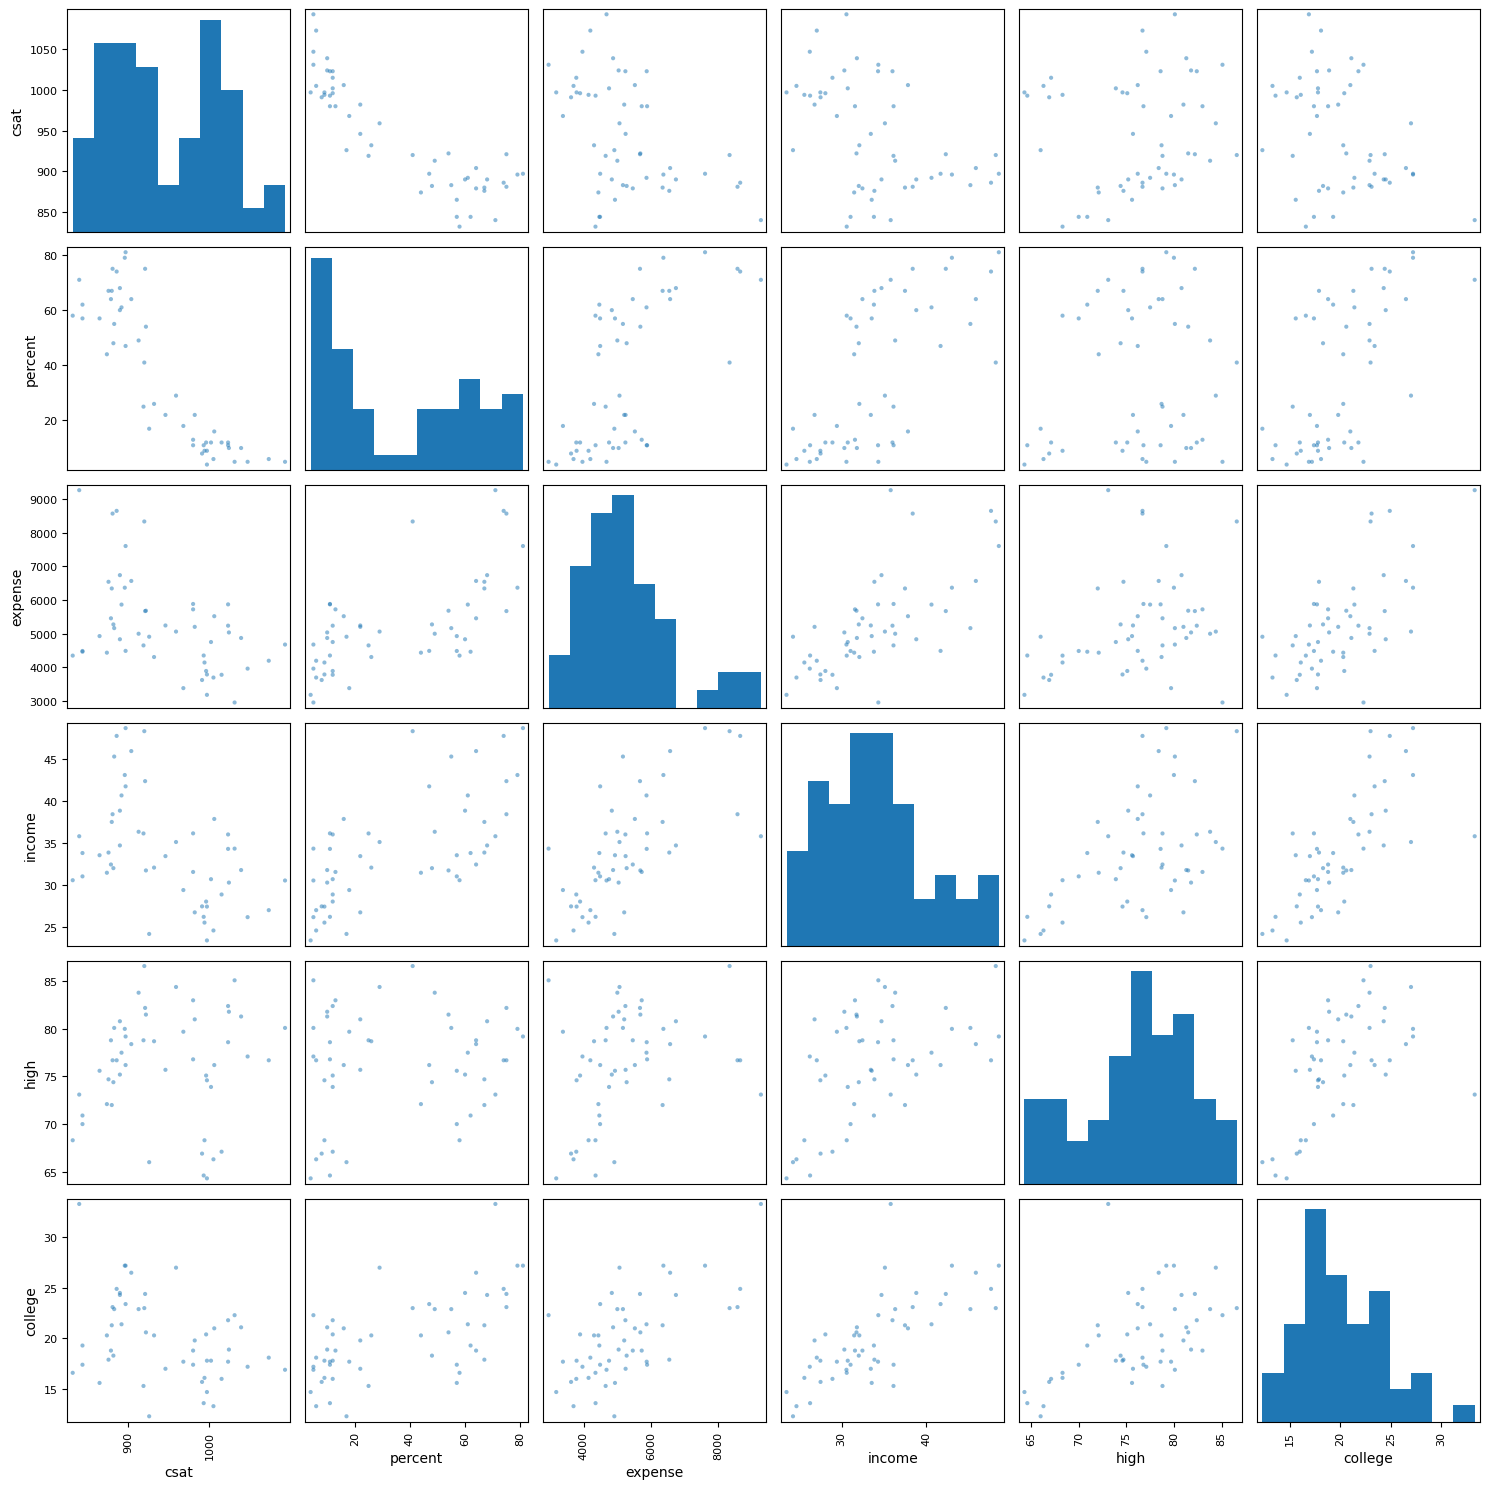

In [27]:
# scatter plot matrix
pd.plotting.scatter_matrix(data, figsize=(15, 15))
plt.tight_layout()
plt.show()

In [28]:
# multiple linear regression models
X = sm.add_constant(data[['region','expense', 'percent', 'income', 'high', 'college']])
y = data['csat']
model_multiple = sm.OLS(y, X).fit()
print("\nMultiple Linear Regression Results:")
print(model_multiple.summary())


Multiple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   csat   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     34.93
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           3.54e-15
Time:                        15:54:00   Log-Likelihood:                -241.59
No. Observations:                  51   AIC:                             497.2
Df Residuals:                      44   BIC:                             510.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        82

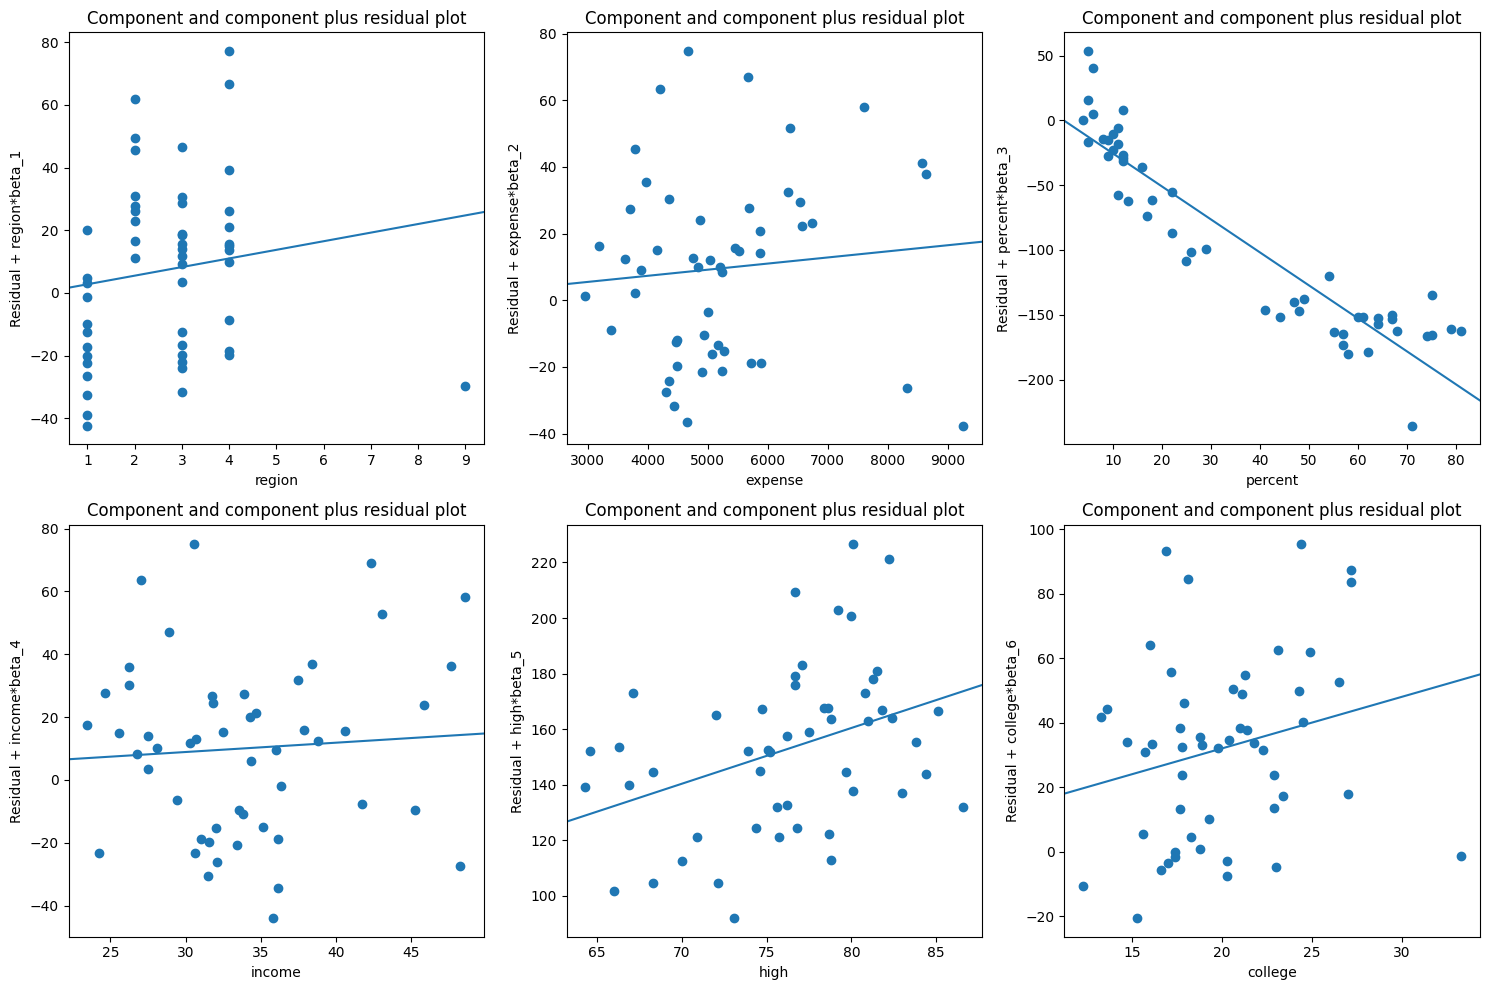

In [30]:
# check linearity
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(X.columns[1:]):  # Skip the constant
    sm.graphics.plot_ccpr(model_multiple, col, ax=axs[i//3, i%3])
plt.tight_layout()
plt.show()

In [32]:
# check homoskedasticity (p-val)
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(model_multiple.resid, model_multiple.model.exog)
print(f"\nBreusch-Pagan test p-value: {p_value}")


Breusch-Pagan test p-value: 0.473689599112849


In [35]:
# check multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors:")
vif_data


Variance Inflation Factors:


,Feature,VIF
0,const,290.265074
1,region,1.629219
2,expense,2.717731
3,percent,2.883214
4,income,3.364117
5,high,2.215776
6,college,3.071242


- there is no multicol among the features
< 4 (max r2 --> 0.75)

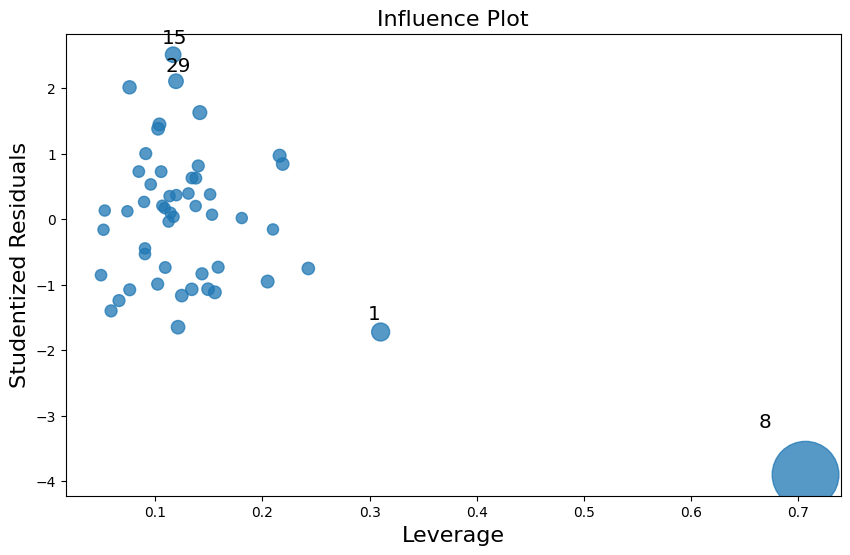

In [37]:
# Checking outliers
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.influence_plot(model_multiple, ax=ax)
plt.show()

In [41]:
# Testing for normality
_, p_value = stats.shapiro(model_multiple.resid)
print(f'\nShapiro-Wilk test p-value: {p_value}')


Shapiro-Wilk test p-value: 0.43283144171363697


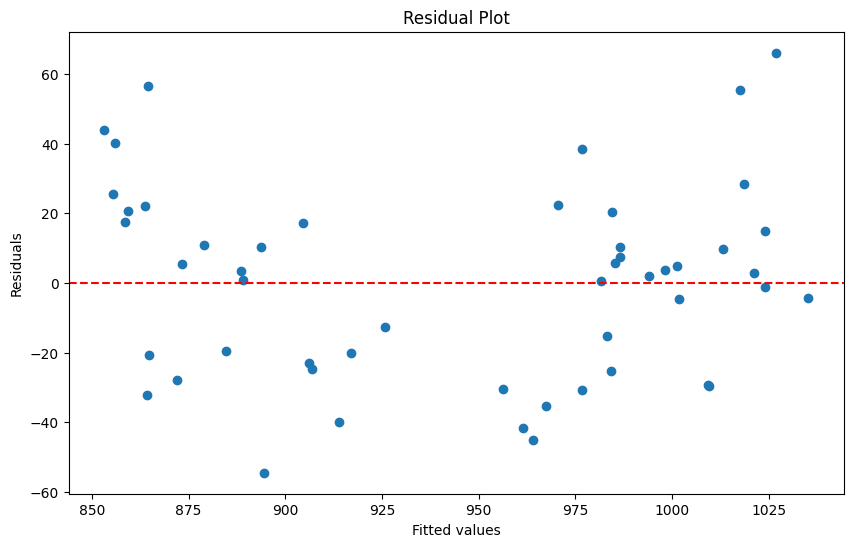

In [39]:
# Residual plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(model_multiple.fittedvalues, model_multiple.resid)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residual Plot")
plt.show()

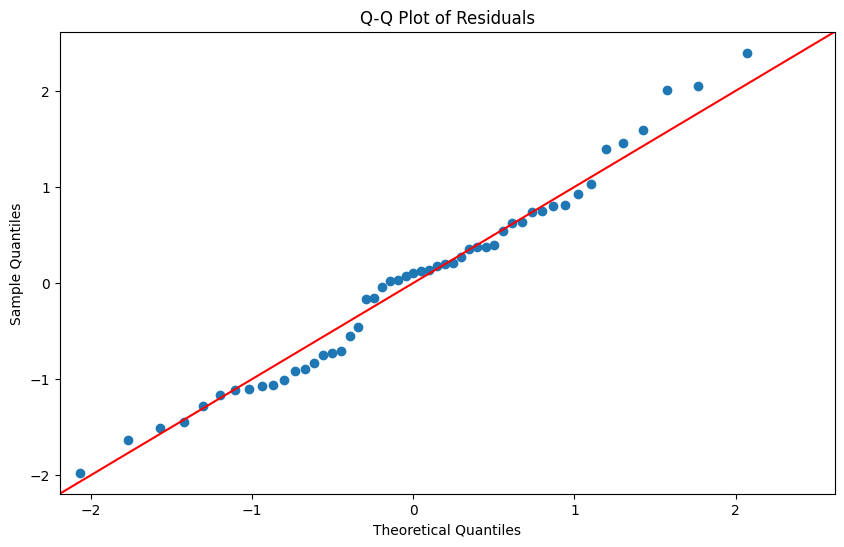

In [40]:
# Q-Q plot
fig, ax = plt.subplots(figsize=(10, 6))
sm.qqplot(model_multiple.resid, line='45', fit=True, ax=ax)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [43]:
# f-test
hypotheses = 'high = college = 0'
f_test = model_multiple.f_test(hypotheses)
print("\nF-test Results:")
print(f_test)


F-test Results:
<F test: F=3.5365426750623516, p=0.03764721044530699, df_denom=44, df_num=2>


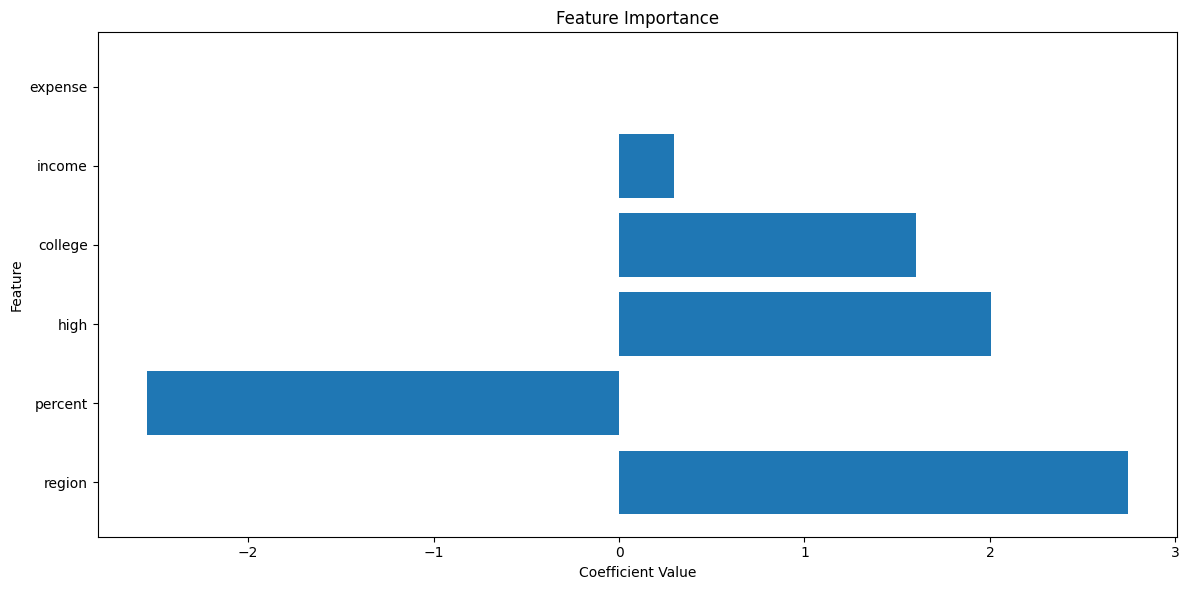

In [45]:
# feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_multiple.params})
coefficients = coefficients.iloc[1:]  # (remove the constant term)
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [46]:
print(model_multiple.params['expense'])

0.001833040219163945
